## **IMPORTING THE IMPORTANT PYHTON LIBRARIES AND THE DATASET.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data=pd.read_csv("/content/Instagram.csv", encoding='latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

# **CHECK IF DATASETS CONTAINS ANY NULL VALUES OR NOT.**

In [ ]:
data.isnull().sum()    # there are no null values

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

# **DROP NULL VALUES**

In [ ]:
data=data.dropna()

# **CHECK DATATYPE OF ALL THE COLUMNS.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


# **LOOK AT THE DISTRIBUTION OF IMPRESSIONS RECEIVED FROM HOME.**

<Figure size 1000x800 with 0 Axes>

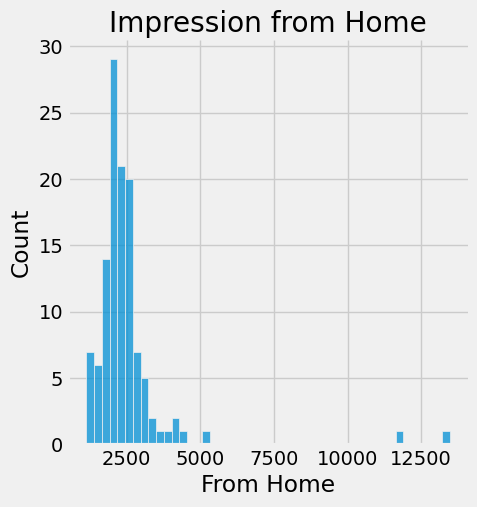

In [ ]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
sns.displot(data['From Home'])
plt.title("Impression from Home")
plt.show()

# **LOOK AT THE DISTRIBUTION OF IMPRESSIONS RECEIVED FROM HASHTAGS.**

<Figure size 1000x800 with 0 Axes>

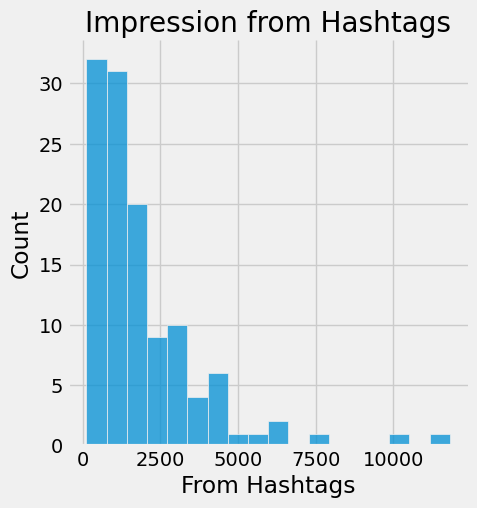

In [ ]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
sns.displot(data['From Hashtags'])
plt.title("Impression from Hashtags")
plt.show()

# **LOOK AT THE DISTRIBUTION OF IMPRESSIONS RECEIVED FROM THE EXPLORE SECTION OF INSTAGRAM**

<Figure size 1000x800 with 0 Axes>

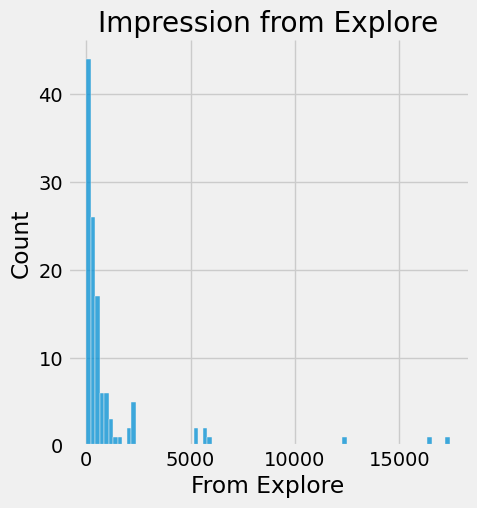

In [ ]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
sns.displot(data['From Explore'])
plt.title("Impression from Explore")
plt.show()

# **LOOK AT THE PERCENTAGE OF IMPRESSIONS FROM VARIOUS SOURCES ON INSATGARAM.**

In [ ]:
import plotly.express as px

home=data["From Home"].sum()
hashtags=data["From Hashtags"].sum()
explore=data["From Explore"].sum()
other=data["From Other"].sum()

labels=['From Home','From Hashtags','From Explore','From Other']
values=[home,hashtags,explore,other]

fig=px.pie(data,values=values,names=labels,title="Impressions on Instagram Posts from various sources",hole=0.4)

fig.show()

# **CREATE A WORDCLOUD OF THE CAPTION COLUMN TO LOOK AT THE MOST USED WORDS IN THE CAPTION OF MY INSTAGRAM POSTS.**

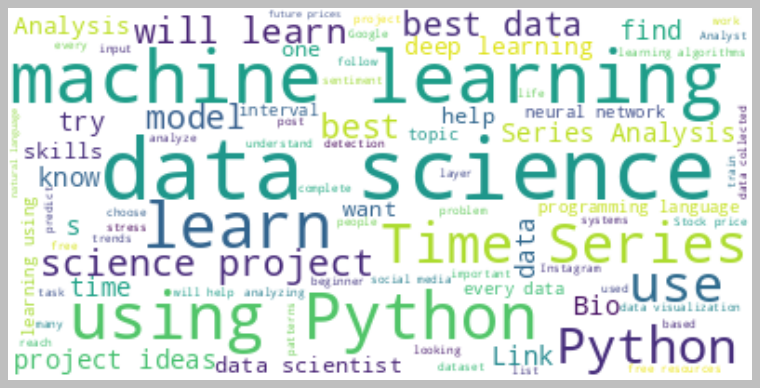

In [ ]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# **CREATE A WORDCLOUD OF THE HASHTAG COLUMN TO LOOK AT THE MOST USED HASHTAGS IN MY INSTAGRAM POSTS.**

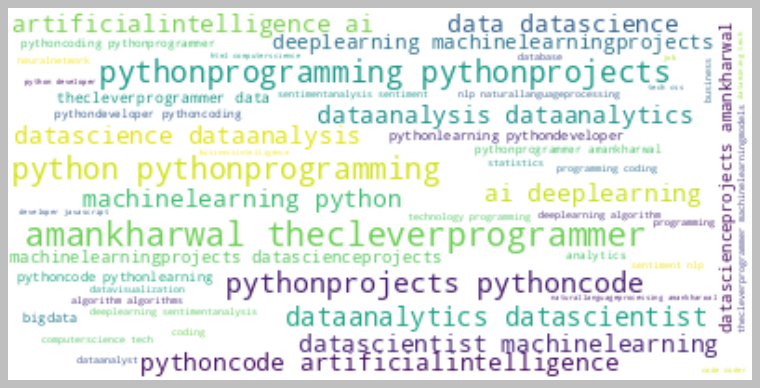

In [ ]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# **LOOK AT THE RELATIONSHIP BETWEEN THE NUMBER OF LIKES AND THE NUMBER OF IMPRESSIONS ON MY INSTAGRAM POSTS.**

In [ ]:
figure=px.scatter(data_frame=data,x="Impressions",y="Likes",size="Likes",trendline="ols",title="Relationship between Likes and Impressions")

figure.show()

# **RELATIONSHIP BETWEEN THE NUMBER OF COMMENTS AND THE NUMBER OF IMPRESSIONS ON MY INSTAGRAM POSTS.**

In [ ]:
figure=px.scatter(data_frame=data,x="Impressions",y="Comments",size="Comments",trendline="ols",title="Relationship between Comments and Total Impressions")

figure.show()

# **RELATIONSHIP BETWEEN THE NUMBER OF SHARES AND THE NUMBER OF IMPRESSIONS ON MY INSTAGRAM POSTS.**

In [ ]:
figure=px.scatter(data_frame=data,x="Impressions",y="Shares",size="Shares",trendline="ols",title="Relationship between Shares and Total Impressions")

figure.show()

# **RELATIONSHIP BETWEEN THE NUMBER OF SAVES AND THE NUMBER OF IMPRESSIONS ON MY INSTAGRAM POSTS.**

In [ ]:
figure=px.scatter(data_frame=data,x="Impressions",y="Saves",size="Saves",trendline="ols",title="Relationship between Saves and Total Impressions")

figure.show()

# **LOOK AT THE CORRELATION OF ALL THE COLUMNS WITH THE IMPRESSIONS COLUMN**

In [ ]:
df = pd.DataFrame(data)

df['Caption'] = pd.factorize(df['Caption'])[0]
df['Hashtags'] = pd.factorize(df['Hashtags'])[0]

correlation_matrix = df.corr()
print(correlation_matrix["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Caption           0.400509
Hashtags          0.190780
Comments         -0.028524
Name: Impressions, dtype: float64


# **LOOK AT THE CONVERSION RATE OF THE INSTAGRAM ACCOUNT.**

In [ ]:
conversion_rate  = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


# **LOOK AT THE RELATIONSHIP BETWEEN THE TOTAL PROFILE VISITS AND THE NUMBER OF FOLLOWERS GAINED FROM ALL PROFILE VISIT.**

In [ ]:
figure=px.scatter(data_frame=data,x="Profile Visits",y="Follows",size="Follows",trendline="ols",title="Relationship between Profile vists and Followers gained")
figure.show()

# **TRAIN A MACHINE LEARNING MODEL TO PREDICT THE REACH OF AN INSTAGRAM POST, SPLIT THE DATA INTO TRAINING AND TEST SETS BEFORE TRAINING THE MODEL.**

In [ ]:
x=np.array(data[['Likes','Saves','Comments','Shares','Profile Visits','Follows']])
y=np.array(data["Impressions"])
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

# **TRAIN A MACHINE LEARNING MODEL TO PREDICT THE REACH OF AN INSTAGRAM POST USING PYHTON.**

In [ ]:
model=PassiveAggressiveRegressor()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8822338883104424

# **PREDICT THE REACH OF AN INSTAGRAM POST BY GIVING INPUTS TO THE MACHINE LAEARNING MODEL.**

In [ ]:
# features=[['Likes','Saves','Comments','Shares','Profile Visits','Follows']]
features=np.array([[282.0,233.0,4.0,9.0,165.0,54.0]])
model.predict(features)

array([13163.20152099])